# Lab3

Створити набір даних за допомогою DatasetGenerator.

Завантажити набір даних для класифікації з сайту Kaggle. Кожен студент має обрати унікальний набір даних.

(Опціонально для отримання відмінної оцінки) Згенерувати набір даних для класифікації, використовуючи стандартні можливості Python (наприклад, з допомогою бібліотек Numpy або random).

Провести моделювання для отриманих наборів даних з використанням регресійного аналізу.

Викласти результати на GitHub у власний репозиторій в основну гілку в папці Lab3.


Середньоквадратична похибка (MSE): 52.56810055436329
Середня абсолютна похибка (MAE): 5.891248620674248
Коефіцієнт детермінації (R^2): 0.9993804358443503


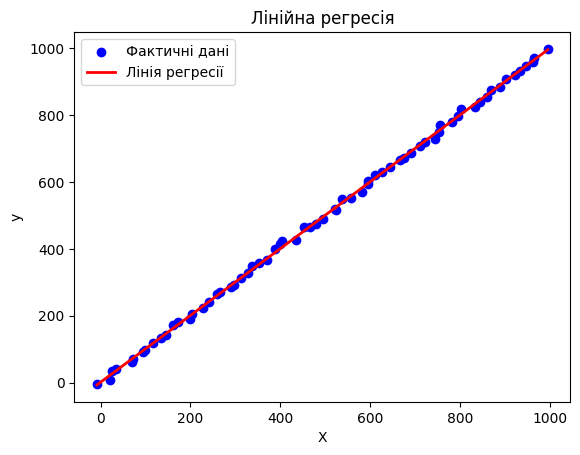

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

noise = 6

data = {
    'X': np.arange(0, 1000, 15),
    'y': np.arange(0, 1000, 15)
}

df = pd.DataFrame(data)

df['X'] += np.random.normal(0, noise, size=df['X'].shape)
df['y'] += np.random.normal(0, noise, size=df['y'].shape)

X = df[['X']]
y = df['y']

model = LinearRegression()

model.fit(X, y)
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Середньоквадратична похибка (MSE): {mse}")
print(f"Середня абсолютна похибка (MAE): {mae}")
print(f"Коефіцієнт детермінації (R^2): {r2}")

plt.scatter(X, y, color='blue', label='Фактичні дані')
plt.plot(X, y_pred, color='red', linewidth=2, label='Лінія регресії')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Лінійна регресія')
plt.legend()
plt.show()

дані з kaggle

In [17]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_train = pd.read_csv("train.csv")

y = df_train["price_range"]
X = df_train.drop("price_range", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_kaggle = LogisticRegression()
model_kaggle.fit(X_train_scaled, y_train)

y_pred = model_kaggle.predict(X_test_scaled)

print("Точність:", accuracy_score(y_test, y_pred))
print("Матриця плутанини:\n", confusion_matrix(y_test, y_pred))
print("Звіт класифікації:\n", classification_report(y_test, y_pred))


Точність: 0.9583333333333334
Матриця плутанини:
 [[144   7   0   0]
 [  3 142   1   0]
 [  0   7 135   6]
 [  0   0   1 154]]
Звіт класифікації:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       151
           1       0.91      0.97      0.94       146
           2       0.99      0.91      0.95       148
           3       0.96      0.99      0.98       155

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



Створити набір даних за допомогою DatasetGenerator

In [3]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

data = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 11)])



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Точність:", accuracy_score(y_test, y_pred))
print("Матриця плутанини:\n", confusion_matrix(y_test, y_pred))
print("Звіт класифікації:\n", classification_report(y_test, y_pred))


Точність: 0.8466666666666667
Матриця плутанини:
 [[118  17]
 [ 29 136]]
Звіт класифікації:
               precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

